
## $\hspace{70pt}$Data Visualization and Analytics Lab (CSP451-3)
## $\hspace{120pt}$ Practical 8


### Name :Vinni Fengade
### Roll No. :67

## $\hspace{70pt} $PART(A): Data Analysis

### Aim: Perform Time Series Analysis to obtain the trend line and forecast using Python

### 1. Implement following methods of Time series for obtaining trend line on the given dataset:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('airline-passengers.csv')

### a) Semi-average method

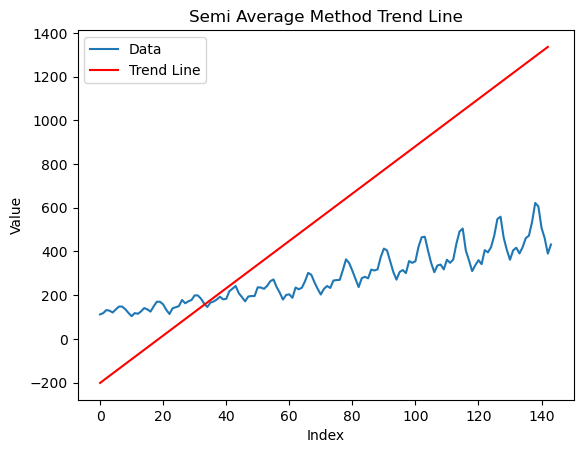

In [7]:
import matplotlib.pyplot as plt

def semi_average_method(data):
    n = len(data)
    half = n // 2
    semi_avg_1 = sum(data[:half]) / half
    semi_avg_2 = sum(data[half:]) / half
    num_avg_1 = (half - 1) / 2
    num_avg_2 = (half + (half / 2) - 1) / 2

    m = (semi_avg_2 - semi_avg_1) / (num_avg_2 - num_avg_1)
    c = semi_avg_1 - num_avg_1 * m

    trend_line_x = []
    trend_line_y = []
    for i in range(n - 1):
        trend_line_y.append(m * i + c)
        trend_line_x.append(i)

    # Plotting the data and trend line
    plt.plot(range(n), data, label='Data')
    plt.plot(trend_line_x, trend_line_y, label='Trend Line', color='red')
    plt.legend()
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Semi Average Method Trend Line')
    plt.show()

# Example usage:
semi_average_method(df['Passengers'])


### b) Moving average method ( 3 yearly/monthly, 5 yearly/monthly)

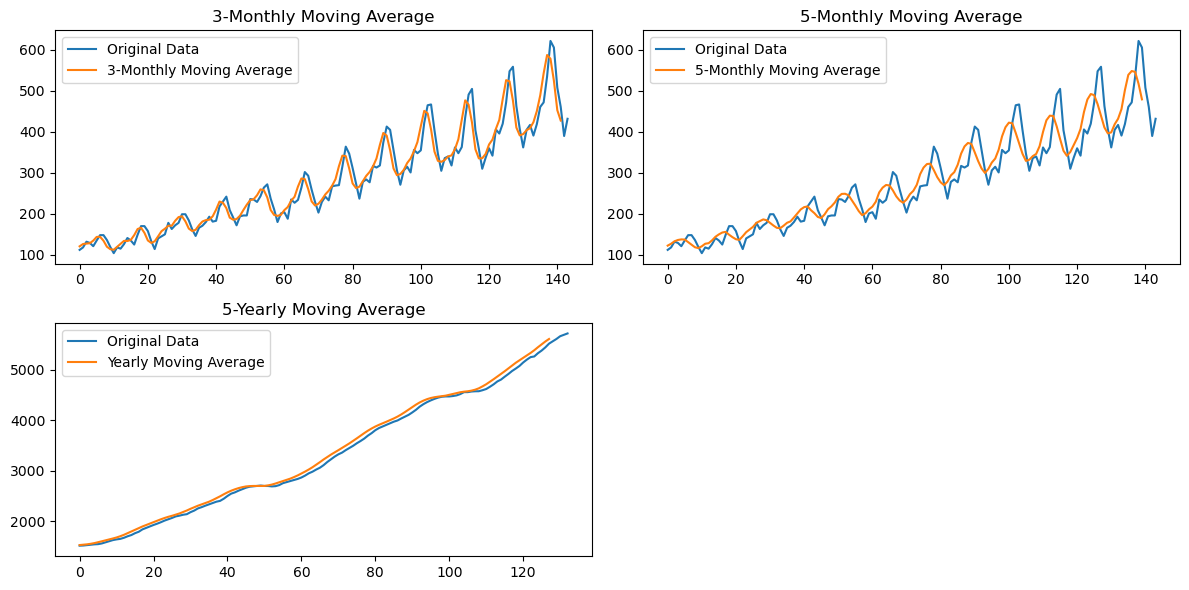

In [4]:
import matplotlib.pyplot as plt

# Assuming df['Passengers'] is the column containing the data

def moving_average_3_monthly(data):
    trend_line = []
    n = len(data)
    
    for i in range(n - 2):
        avg_3_monthly = (data[i] + data[i+1] + data[i+2]) / 3
        trend_line.append(avg_3_monthly)
    
    return trend_line

trend_3_monthly = moving_average_3_monthly(df['Passengers'])

def moving_average_5_monthly(data):
    trend_line = []
    n = len(data)
    
    for i in range(n - 4):
        avg_5_monthly = (data[i] + data[i+1] + data[i+2] + data[i+3] + data[i+4]) / 5
        trend_line.append(avg_5_monthly)
    
    return trend_line

trend_5_monthly = moving_average_5_monthly(df['Passengers'])

def moving_average_5_yearly(data, window_size=12):
    trend_line = []
    data_yearly = []
    n = len(data)
    
    for i in range(n - window_size + 1):
        monthly_avg = sum(data[i:i+window_size])
        data_yearly.append(monthly_avg)
    
    no_years = len(data_yearly)
    for i in range(no_years - 5):
        avg_5_yearly = (data_yearly[i] + data_yearly[i+1] + data_yearly[i+2] + data_yearly[i+3] + data_yearly[i+4]) / 5
        trend_line.append(avg_5_yearly)
    
    return trend_line,data_yearly

trend_5_yearly, data_yearly = moving_average_5_yearly(df['Passengers'], window_size=12)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(df['Passengers'], label='Original Data')
plt.plot(trend_3_monthly, label='3-Monthly Moving Average')
plt.title('3-Monthly Moving Average')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df['Passengers'], label='Original Data')
plt.plot(trend_5_monthly, label='5-Monthly Moving Average')
plt.title('5-Monthly Moving Average')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(data_yearly, label='Original Data')
plt.plot(trend_5_yearly, label='Yearly Moving Average')
plt.title('5-Yearly Moving Average')
plt.legend()

plt.tight_layout()
plt.show()


### c) Least square method

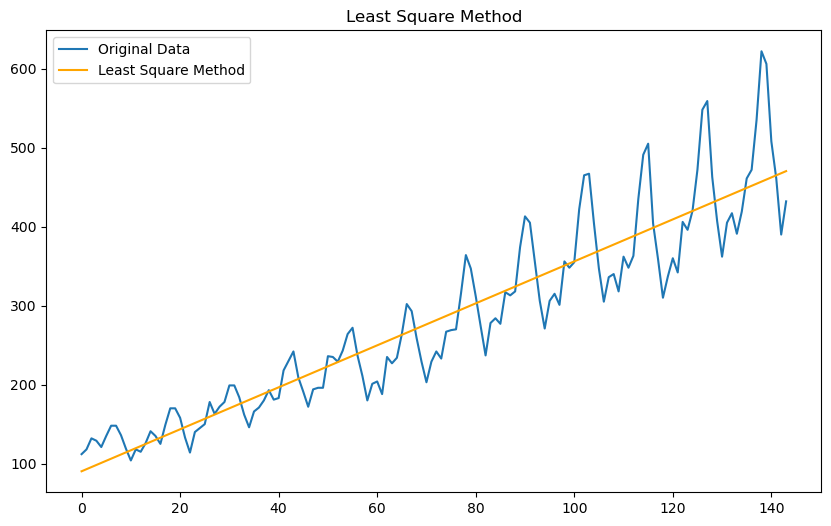

In [5]:
def least_square_method(data):
    n = len(data)
    x = np.arange(1, n+1)
    A = np.vstack([x, np.ones(n)]).T
    m, b = np.linalg.lstsq(A, data, rcond=None)[0]
    
    trend_line = m * x + b
    
    return trend_line

trend_least_square = least_square_method(df['Passengers'])

# Plotting Least Square Method
plt.figure(figsize=(10, 6))
plt.plot(df['Passengers'], label='Original Data')
plt.plot(trend_least_square, label='Least Square Method', color='orange')
plt.title('Least Square Method')
plt.legend()
plt.show()

## Superstore1.csv

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
# Replace 'your_dataset.csv' with the actual filename or path
df = pd.read_csv('Superstore1.csv',encoding="Latin1")

# Assuming 'Order Date' is the time series column and 'Sales' is the value to analyze
df['Order Date'] = pd.to_datetime(df['Order Date'])
df = df.sort_values(by='OrderDate')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15-04-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22-11-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-05-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27-08-2014' in DD/MM/YYYY format. Provide format or specif

KeyError: 'OrderDate'

In [13]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-08-11,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-12-06,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-11-10,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-11-10,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


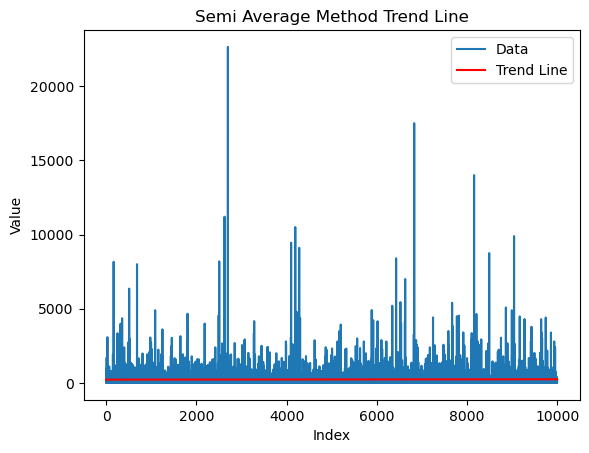

In [14]:
import matplotlib.pyplot as plt

def semi_average_method(data):
    n = len(data)
    half = n // 2
    semi_avg_1 = sum(data[:half]) / half
    semi_avg_2 = sum(data[half:]) / half
    num_avg_1 = (half - 1) / 2
    num_avg_2 = (half + (half / 2) - 1) / 2

    m = (semi_avg_2 - semi_avg_1) / (num_avg_2 - num_avg_1)
    c = semi_avg_1 - num_avg_1 * m

    trend_line_x = []
    trend_line_y = []
    for i in range(n - 1):
        trend_line_y.append(m * i + c)
        trend_line_x.append(i)

    # Plotting the data and trend line
    plt.plot(range(n), data, label='Data')
    plt.plot(trend_line_x, trend_line_y, label='Trend Line', color='red')
    plt.legend()
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Semi Average Method Trend Line')
    plt.show()

# Example usage:
semi_average_method(df['Sales'])

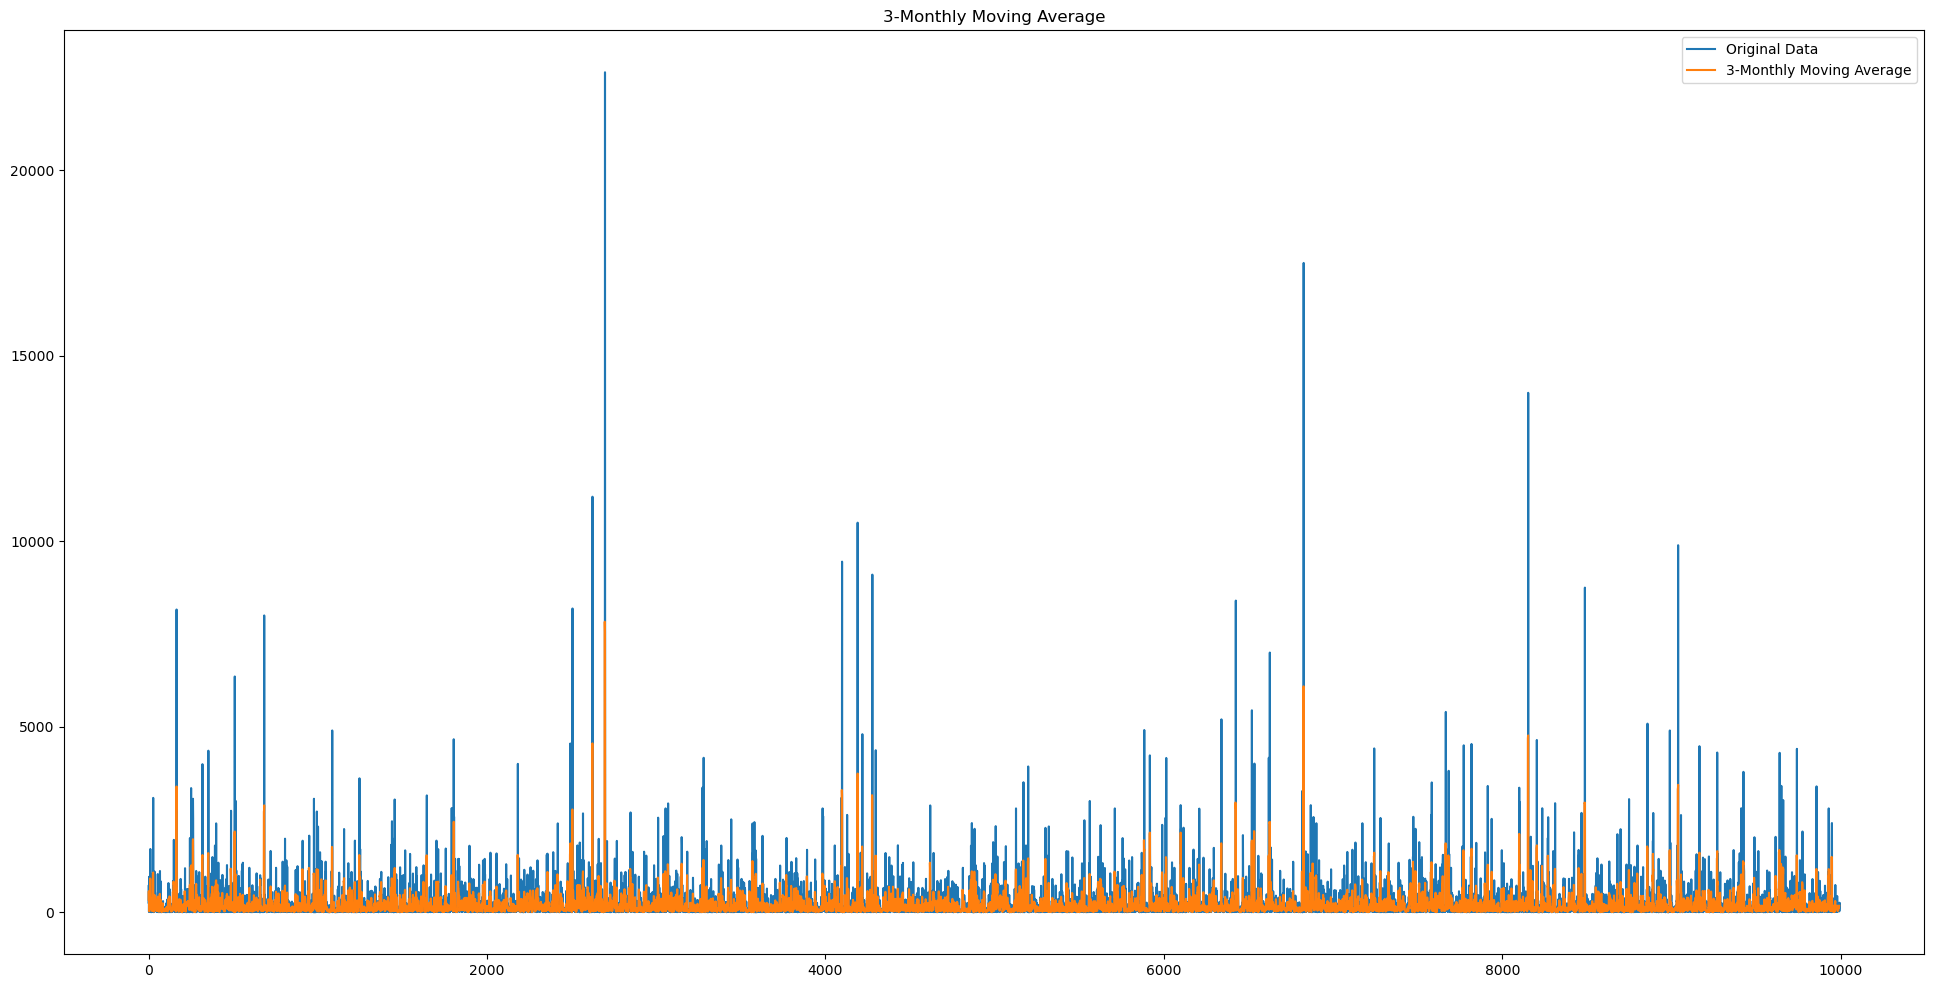

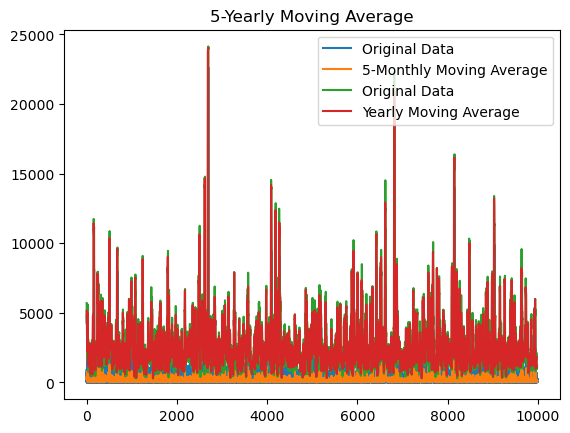

In [19]:
# b) Moving Average Method
import matplotlib.pyplot as plt

# Assuming df['Passengers'] is the column containing the data

def moving_average_3_monthly(data):
    trend_line = []
    n = len(data)
    
    for i in range(n - 2):
        avg_3_monthly = (data[i] + data[i+1] + data[i+2]) / 3
        trend_line.append(avg_3_monthly)
    
    return trend_line

trend_3_monthly = moving_average_3_monthly(df['Sales'])

def moving_average_5_monthly(data):
    trend_line = []
    n = len(data)
    
    for i in range(n - 4):
        avg_5_monthly = (data[i] + data[i+1] + data[i+2] + data[i+3] + data[i+4]) / 5
        trend_line.append(avg_5_monthly)
    
    return trend_line

trend_5_monthly = moving_average_5_monthly(df['Sales'])

def moving_average_5_yearly(data, window_size=12):
    trend_line = []
    data_yearly = []
    n = len(data)
    
    for i in range(n - window_size + 1):
        monthly_avg = sum(data[i:i+window_size])
        data_yearly.append(monthly_avg)
    
    no_years = len(data_yearly)
    for i in range(no_years - 5):
        avg_5_yearly = (data_yearly[i] + data_yearly[i+1] + data_yearly[i+2] + data_yearly[i+3] + data_yearly[i+4]) / 5
        trend_line.append(avg_5_yearly)
    
    return trend_line,data_yearly

trend_5_yearly, data_yearly = moving_average_5_yearly(df['Sales'], window_size=12)

# Plotting
plt.figure(figsize=(24, 12))

# plt.subplot(2, 2, 1)
plt.plot(df['Sales'], label='Original Data')
plt.plot(trend_3_monthly, label='3-Monthly Moving Average')
plt.title('3-Monthly Moving Average')
plt.legend()
plt.show()

# plt.subplot(2, 2, 2)
plt.plot(df['Sales'], label='Original Data')
plt.plot(trend_5_monthly, label='5-Monthly Moving Average')
plt.title('5-Monthly Moving Average')
plt.legend()

# plt.subplot(2, 2, 3)
plt.plot(data_yearly, label='Original Data')
plt.plot(trend_5_yearly, label='Yearly Moving Average')
plt.title('5-Yearly Moving Average')
plt.legend()

# plt.tight_layout()
plt.show()

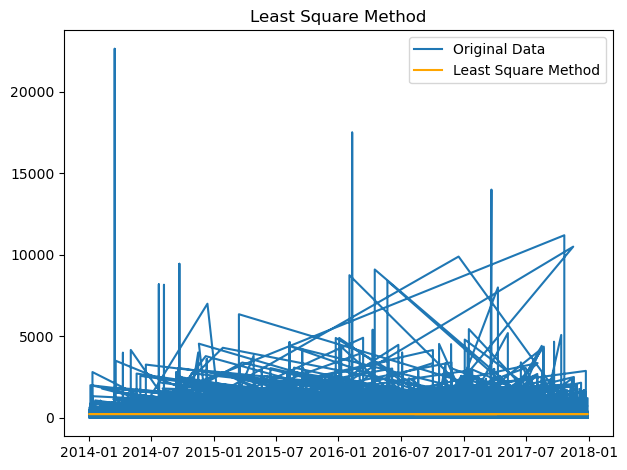

In [21]:
# c) Least Square Method
def least_square_method(data):
    x = range(len(data))
    A = pd.DataFrame({'x': x, 'constant': 1})
    y = data.values

    result = pd.DataFrame(np.linalg.lstsq(A, y, rcond=None)[0], index=A.columns, columns=['coeff'])
    trend_line = result.loc['constant']['coeff'] + result.loc['x']['coeff'] * pd.Series(x)
    
    return trend_line

trend_least_square = least_square_method(df['Sales'])

# plt.subplot(2, 2, 4)
plt.plot(df['Order Date'], df['Sales'], label='Original Data')
plt.plot(df['Order Date'], trend_least_square, label='Least Square Method', color='orange')
plt.title('Least Square Method')
plt.legend()

plt.tight_layout()
plt.show()